### Rachana Amgai
### Assignment 8
### 1/27/2025

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv('fb_stock_prices_2018 .csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('earthquakes .csv')
covid = pd.read_csv('covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']


FileNotFoundError: [Errno 2] No such file or directory: 'fb_stock_prices_2018.csv'

# 1 Create the heatmap for correlation between earthquake magnitude and tsunami occurrence

In [14]:
plt.figure(figsize=(6, 4))  # Set figure size for better readability
sns.heatmap(
    quakes.query('magType == "mb"')[['mag', 'tsunami']].corr(), 
    annot=True, center=0, vmin=-1, vmax=1, cmap='coolwarm'
)

# Improve formatting
plt.yticks(rotation=0)
plt.title('Correlation Between Earthquake Magnitude (mb) \nand Tsunami Occurrence', y=1.05)
plt.show()


NameError: name 'quakes' is not defined

### Problem 2

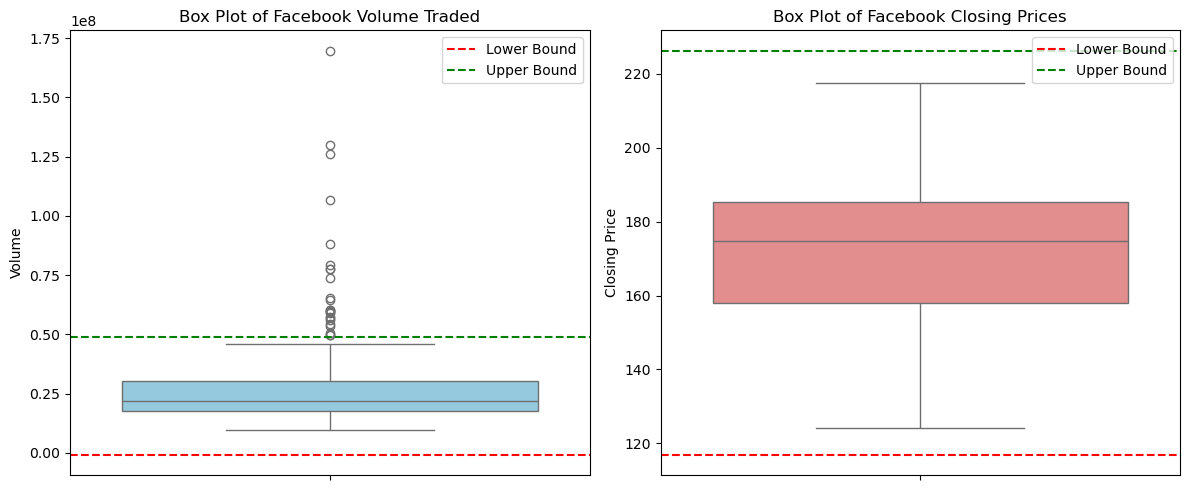

In [19]:
# Define function to compute Tukey fences
def tukey_fences(series):
    Q1 = series.quantile(0.25)  # First quartile
    Q3 = series.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower Tukey fence
    upper_bound = Q3 + 1.5 * IQR  # Upper Tukey fence
    return lower_bound, upper_bound

# Compute Tukey fences for Volume and Closing Price
vol_lower, vol_upper = tukey_fences(fb['volume'])
close_lower, close_upper = tukey_fences(fb['close'])

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Box plot for Facebook volume traded
sns.boxplot(y=fb['volume'], ax=axes[0], color='skyblue')
axes[0].axhline(vol_lower, color='red', linestyle='--', label='Lower Bound')
axes[0].axhline(vol_upper, color='green', linestyle='--', label='Upper Bound')
axes[0].set_title('Box Plot of Facebook Volume Traded')
axes[0].set_ylabel('Volume')
axes[0].legend()

# Box plot for Facebook closing prices
sns.boxplot(y=fb['close'], ax=axes[1], color='lightcoral')
axes[1].axhline(close_lower, color='red', linestyle='--', label='Lower Bound')
axes[1].axhline(close_upper, color='green', linestyle='--', label='Upper Bound')
axes[1].set_title('Box Plot of Facebook Closing Prices')
axes[1].set_ylabel('Closing Price')
axes[1].legend()

# Improve layout and show the plot
plt.tight_layout()
plt.show()


### problem 3

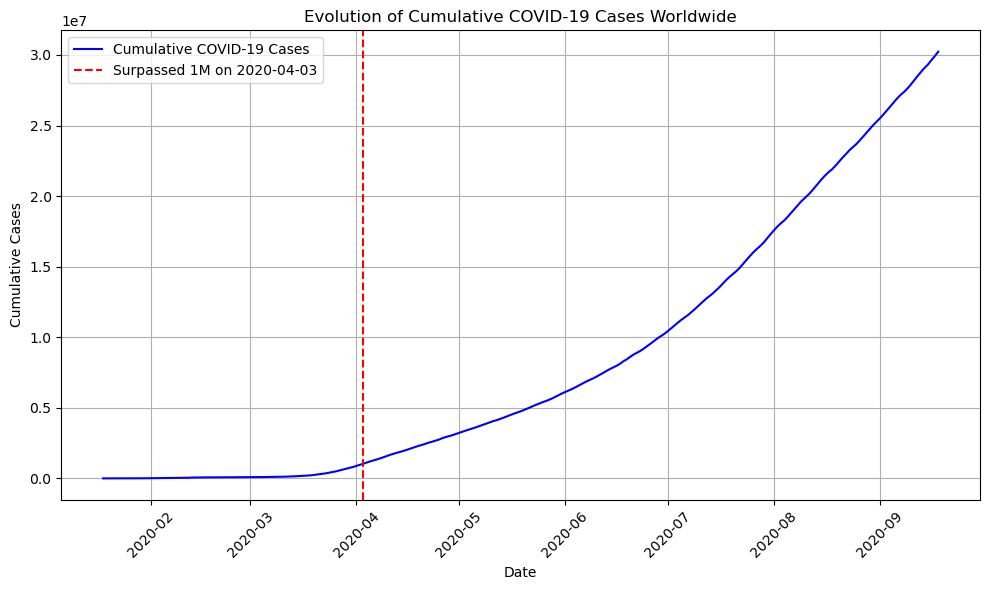

In [25]:
# Convert the dateRep column to datetime format for easier handling
covid['dateRep'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')

# Sort the data by date in ascending order
covid.sort_values(by='dateRep', inplace=True)

# Aggregate the cases globally by date
worldwide_cases = covid.groupby('dateRep')['cases'].sum().cumsum()

# Find the date when the cumulative cases surpassed 1 million
date_million = worldwide_cases[worldwide_cases > 1e6].index[0]

# Plot the cumulative cases over time
plt.figure(figsize=(10, 6))
plt.plot(worldwide_cases.index, worldwide_cases.values, label='Cumulative COVID-19 Cases', color='blue')

# Add a dashed vertical line when cases surpassed 1 million
plt.axvline(date_million, color='red', linestyle='--', label=f'Surpassed 1M on {date_million.date()}')

# Add labels and title
plt.title('Evolution of Cumulative COVID-19 Cases Worldwide')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Problem 4

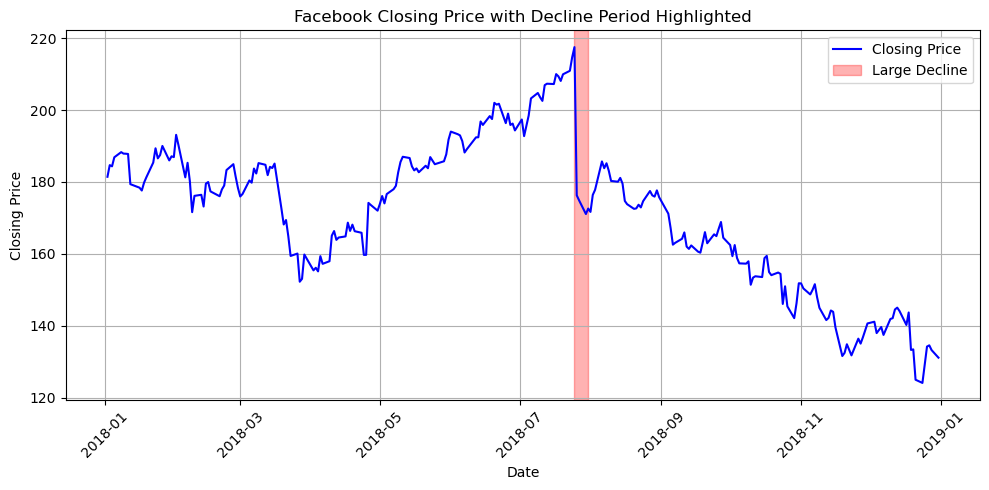

In [30]:
# Plot Facebook closing price over time
plt.figure(figsize=(10, 5))
plt.plot(fb.index, fb['close'], label='Closing Price', color='blue')

# Shade the decline period using axvspan
plt.axvspan('2018-07-25', '2018-07-31', color='red', alpha=0.3, label='Large Decline')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Closing Price with Decline Period Highlighted')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### problem 5

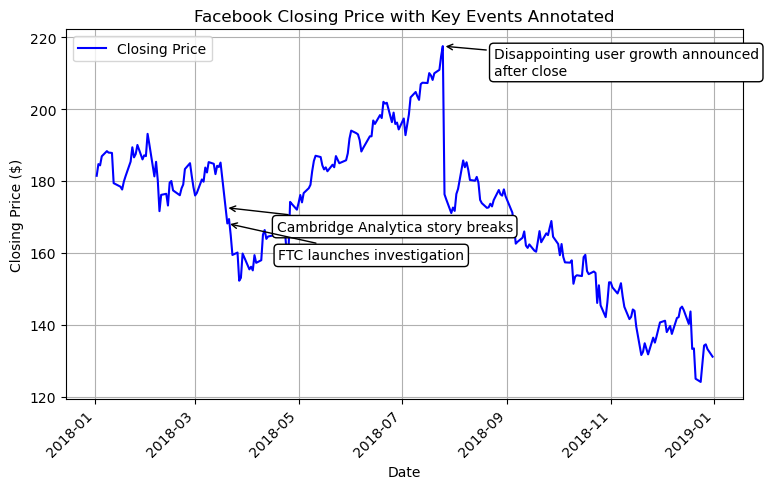

In [51]:
# Create a line plot for Facebook closing prices
plt.figure(figsize=(8, 5))
fb['close'].plot(kind='line', color='blue', label='Closing Price')

# Define key events with their respective dates
notes = [
    ('Disappointing user growth announced\nafter close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]

# Set random seed for repeatable jitter effect
np.random.seed(1)

# Annotate key events
for text, date in notes:
    date = pd.to_datetime(date)  # Convert to datetime for indexing
    y_value = fb.loc[date, 'close']
    jitter = np.random.uniform(-10, -5)  # Slight offset to avoid overlap
    plt.annotate(
        text, 
        xy=(date, y_value),
        xytext=(date + pd.Timedelta(days=30), y_value + jitter),  # Move text 30 days forward
        arrowprops=dict(arrowstyle='->', color='black'),
        fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
    )

# Formatting
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Facebook Closing Price with Key Events Annotated')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


### problem 6

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm

def reg_resid_plots(model, X, y):
    """
    Creates regression residual plots with a qualitative colormap.
    
    Parameters:
        model: A fitted regression model.
        X: The feature matrix (DataFrame).
        y: The target variable (Series).
    """
    # Generate predictions and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    # Choose a qualitative colormap
    cmap = cm.get_cmap('tab10', len(X.columns))  # 'tab10' is a qualitative colormap

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Scatter plot: predicted values vs. residuals
    scatter_colors = [cmap(i) for i in range(len(X.columns))]  # Assign colors from colormap
    axes[0].scatter(y_pred, residuals, color=scatter_colors[0], alpha=0.6)
    axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
    axes[0].set_xlabel("Predicted Values")
    axes[0].set_ylabel("Residuals")
    axes[0].set_title("Residuals vs. Predicted Values")

    # Histogram of residuals
    axes[1].hist(residuals, bins=20, color=scatter_colors[1], alpha=0.7, edgecolor='black')
    axes[1].set_xlabel("Residuals")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title("Histogram of Residuals")

    # Improve layout and display plot
    plt.tight_layout()
    plt.show()


In [8]:
import itertools
from matplotlib import cm

def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns 
    in the data.

    Parameters:
        - data: A `pandas.DataFrame` object

    Returns:
        A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(
        permutation_count, 
        2, 
        figsize=(15, 4 * permutation_count)
    )
    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        [cm.Dark2(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            
            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')

    return fig.axes

In [5]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm

def reg_resid_plots(data):
    """
    Using `seaborn`, plot regression and residuals
    side-by-side for every permutation of 2 columns in the data.

    Parameters:
        - data: A `pandas.DataFrame` object

    Returns:
        A matplotlib `Figure` object.
    """
    num_cols = data.shape[1]
    permutations = list(itertools.permutations(data.columns, 2))
    permutation_count = len(permutations)

    # Create subplots
    fig, ax = plt.subplots(
        permutation_count, 
        2, 
        figsize=(15, 4 * permutation_count),
        constrained_layout=True
    )

    # Get qualitative colormap with enough distinct colors
    cmap = cm.get_cmap('Dark2', permutation_count)
    
    for (x, y), axes, color in zip(permutations, ax, [cmap(i) for i in range(permutation_count)]):
        # Regression plot
        sns.regplot(x=data[x], y=data[y], ax=axes[0], color=color)
        axes[0].set_title(f'Regression: {x} vs {y}')
        axes[0].set_xlabel(x)
        axes[0].set_ylabel(y)

        # Residual plot
        sns.residplot(x=data[x], y=data[y], ax=axes[1], color=color)
        axes[1].set_title(f'Residuals: {x} vs {y}')
        axes[1].set_xlabel(x)
        axes[1].set_ylabel('Residuals')

    return fig


#### Title: Chapter 6 Exercise
#### Author: Stefanie Molin
#### Date: 1/27/2025
#### Modified By: Rachana Amgai
#### Description: Problems 1 to 6